# Projeto 1

###### Nome:  Rogério P. A. Ferrari 

### TÍTULO:  Impacto no IDH de um país

# Introdução

O IDH é um índice que indica a qualidade de vida e o desenvolvimento de uma população, medido através do nível de escolaridade/ educação, longevidade e renda do país. Tendo em vista estas 3 variáveis que compõe o IDH (que será analisada somente como IDH no projeto), foram escolhidas mais duas. Para ter uma análise mais direcionada sobre estas 3 variáveis, foi feita uma pergunta a ser respondida através de gráficos e uma conclusão explicativa.


### Outras 2 variáveis escolhidas:
- Porcentagem de internet usada por um país
- Porcentagem total gasta pelo governo do país em saúde

### Pergunta:
#### Qual o impacto que a internet usada por um país (em %) e o total gasto por seu governo em saúde (em %) podem ter em seu IDH?

# Dados

In [227]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_excel('comparacao_tres_variaveis.xlsx')



Para conseguir entender de maneira mais clara o impacto de uma variável sobre o IDH, será feito um gráfico do estilo "scatter" para a análise entre os valores do IDH e a variável utilizada. Logo após o gráfico, será feito uma tabela que mostra a correlação entre essas duas variáveis.

In [228]:
def disp_reta(data,x,y):
    
    datax = data[x]
    datay = data[y]
    
    
    covar = datax.cov(datay)
    varx = datax.var()
    vary = datay.var()
    medx = datax.mean()
    medy = datay.mean()
    
    a = covar/varx
    
    b = medy-a*medx
    
    minx = datax.min()
    maxx = datax.max()
    
    plt.scatter(datax, datay)
    plt.plot((minx,maxx),(a*minx+b,a*maxx+b),color ='red')
    plt.title('{0} x {1}'.format(x,y))
    plt.xlabel(x)
    plt.ylabel(y)
    
    return a,b
    

Coef linear(b):  -70.83907209605077
Coef angular(a): 152.03956029226256


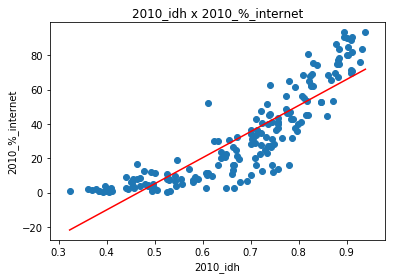

In [229]:
a,b = disp_reta(tabela, x="2010_idh", y = '2010_%_internet')
print('Coef linear(b): ', b)
print('Coef angular(a):' , a)


In [230]:
tabela.loc[:, ['2010_idh','2010_%_internet']].corr()

,2010_idh,2010_%_internet
2010_idh,1.000000,0.877226
2010_%_internet,0.877226,1.000000


Analisando o gráfico acima juntamente com a tabela, da pra perceber que a porcentagem de internet utilizada por uma população tem um impacto considerado grande no IDH. Esta afirmativa é dada por conta de dois motivos: 

O tamanho do impacto de uma variável em outra no gráfico, é visto da seguinte maneira: Quanto mais próximas da linha os pontos estiverem, maior o impacto (correlação) e vice-versa.

Em relação à tabela, o impacto é perceptível da seguinte maneira: Quanto mais próximo de 1 a correlação, mais forte ela será, e consequentemente no gráfico, mais próximo os pontos estarão na linha, e quanto mais longe de 1, menor será essa correlação.

Tendo em vista estas duas definições acima, a análise geral da internet VS IDH mostra valores próximos da linha, e consequentemente, na tabela, próximos a 1.

Coef linear(b):  4.053754953813733
Coef angular(a): 10.690292465708517


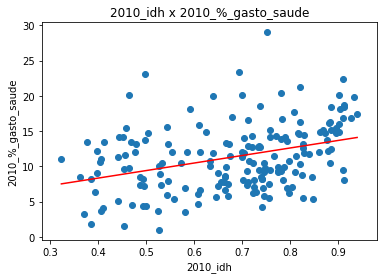

In [231]:
a,b = disp_reta(tabela, x="2010_idh", y = '2010_%_gasto_saude')
print('Coef linear(b): ', b)
print('Coef angular(a):' , a)


In [232]:
tabela.loc[:, ['2010_idh','2010_%_gasto_saude']].corr()

,2010_idh,2010_%_gasto_saude
2010_idh,1.000000,0.352607
2010_%_gasto_saude,0.352607,1.000000


O caso acima mostra o impacto da porcentagem que o governo gasta em saúde com o IDH. Em comparação a análise anterior, é perceptível, apenas pelo gráfico, que o impacto da porcentagem gasta em saúde no IDH é menor que o da internet. 

Para se ter essa certeza, olha-se o valor da tabela. E realmente é bem menor que o da internet. 

Enquanto o da internet a correlação é de aproximadamente 0.9, em relação a saúde a correlação não chega nem a metade deste valor.

Coef linear(b):  7.3103895680672615
Coef angular(a): 2.2144792097327928


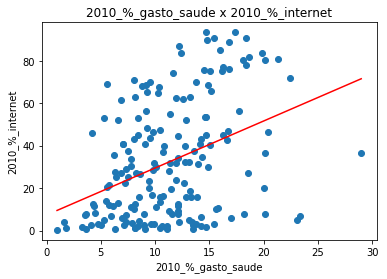

In [233]:
a,b = disp_reta(tabela, x="2010_%_gasto_saude", y = '2010_%_internet')
print('Coef linear(b): ', b)
print('Coef angular(a):' , a)

In [234]:
tabela.loc[:, ['2010_%_gasto_saude','2010_%_internet']].corr()

,2010_%_gasto_saude,2010_%_internet
2010_%_gasto_saude,1.000000,0.384032
2010_%_internet,0.384032,1.000000


Esta última análise mostra a correlação entre as duas variáveis escolhidas para o Projeto 1. A princípio, olhando o gráfico entre estas duas variáveis, ele parece ser o gráfico que tem a menor correlação entre variáveis se comparado com os dois anteriores. E a tabela comprova que a afirmação de que "é o gráfico com a menor correlação" é falsa.

Olhando os valores das tabelas:

##### 0.87 entre  internet e IDH

##### 0.35 entre  saúde e IDH

##### 0.38 entre  saúde e internet

Portanto, apesar de o gráfico levar a uma certa análise, a tabela mostra que os dados tem uma interpretação diferente. E que a influência que a internet tem na saúde é maior do que a influência que a saúde tem no IDH.



# Análise temporal

In [235]:
idhanos = pd.read_excel('idh_de_3_anos.xlsx')

In [236]:
mean2000 = idhanos[2000].mean()
median2000 = idhanos[2000].median()
mean2005 = idhanos[2005].mean()
median2005=idhanos[2005].median()
mean2010 = idhanos[2010].mean()
median2010 = idhanos[2010].median()

print('Médias\n2000:  {0:.3f}\n2005:  {1:.3f}\n2010:  {2:.3f}'.format(mean2000,mean2005,mean2010))
print('\n\nMedianas\n2000:  {0:.3f}\n2005:  {1:.3f}\n2010:  {2:.3f}'.format(median2000,median2005,median2010))

Médias
2000:  0.628
2005:  0.651
2010:  0.679


Medianas
2000:  0.656
2005:  0.687
2010:  0.711


A análise feita acima foi a da evolução do IDH ao longo do tempo.

Olhando o valor das médias e medianas é perceptível que o IDH dos países ao longo dos anos foi crescendo.

Para estar entre os 10%:
2000: maior que 0.8539999999999999
2005: maior que 0.869
2010: maior que0.8834


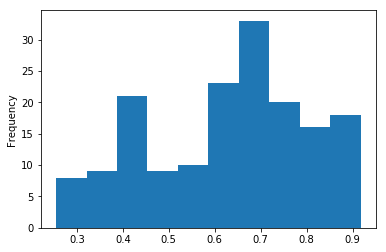

In [237]:
idhanos[2000].plot.hist()
a = idhanos[2000].quantile(0.9)
b = idhanos[2005].quantile(0.9)
c = idhanos[2010].quantile(0.9)
print('Para estar entre os 10%:\n2000: maior que {0}\n2005: maior que {1}\n2010: maior que{2}'.format(a,b,c))

Analisando ainda a evolução do IDH ao longo dos anos, foi visto acima o quanto mudou o valor para que um país pudesse ser considerado um dos 10% mais desenvolvidos do mundo. Assim como o valor da média e mediana, o valor para que um país alcançasse esse patamar subiu também.


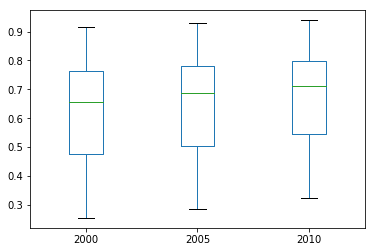

In [238]:
idhanos.plot.box()

In [239]:
idhXinternet = pd.read_excel('anos_internet_idh.xlsx')

In [240]:
idhXinternet.set_index('geo')
cor2000 = idhXinternet.loc[:, ['2000_idh','2000_%_internet']].corr()
cor2000

,2000_idh,2000_%_internet
2000_idh,1.000000,0.689422
2000_%_internet,0.689422,1.000000


In [241]:
cor2005= idhXinternet.loc[:, ['2005_idh','2005_%_internet']].corr()
cor2005

,2005_idh,2005_%_internet
2005_idh,1.000000,0.783003
2005_%_internet,0.783003,1.000000


Esta última análise foi feita para ver, também ao longo do tempo, a evolução da correlação entre a variável da porcentagem de internet usada por uma população VS IDH.

Comparando as tabelas de 2000, 2005 e 2010, é possível ver um aumento de ano para ano em relação a essa correlação. 

Isso significa dizer que a cada ano o impacto que a internet teve no IDH foi cada vez maior.

# Conclusão

Os dados fazem com que se possa ver a veracidade de uma informação. Portanto, saber extrair valores de uma tabela para uma análise específica, é de muita importância.

Em relação as 2 variáveis extraídas, juntamente com o IDH, é perceptível que a medida em que a população de um país vai tendo acesso à internet, o IDH do país tende a aumentar. E, diferentemente do que eu imaginava, a porcentagem gasta em saúde pelo governo não tem um impacto grande no IDH, e isto não significa que está errado, pois os dados mostram o fato.

Para Fabiola Sulpino, doutora em Saúde Coletiva, "é preciso investir mais em saúde pública no país, e isso significa alocar mais recursos para o funcionamento dos serviços com qualidade, para a ampliação da oferta e a melhoria da gestão(...)temos que debater mais sobre a importância da saúde e sobre como financiá-la. As escolhas do passado podem estar comprometendo significativamente o desenvolvimento econômico e social de nossa nação."(entrevista para a Revista Construção). Portanto, não é porque a influência da saúde no IDH está baixa agora que vai continuar assim. Se as mudanças forem feitas de maneira correta e racional, esses dados tendem a mudar.

Já a internet vem crescendo de maneira muito acelerada, tendo influência em diversos campos. Na Era Digital, a internet age como um facilitador, principalmente para o acesso e troca de informações, sendo estes dois fatores um dos principais responsáveis pela internet ser o que é hoje. 

No blog de Eduardo Finzi, diretor da Cedro, ele afirma em relação as informações proporcionadas pela internet que "se forem utilizadas de forma correta, poderão contribuir para a melhora da entrega e qualidade dos serviços prestados para nossa sociedade.". Esta afirmação de Eduardo, resume como um todo o impacto das variáveis utilizadas para este projeto: a internet se utilizada de boa maneira ajudará para a qualidade de serviços prestados a sociedade, como a saúde, que consequentemente ajudará no IDH. E que apesar de a solução parecer ser fácil de ser resolvida, muitas outras questões e burocracias estão envolvidas para que isto ocorrá.

